## 过拟合和欠拟合

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 首先构建虚拟数据
np.random.seed(666)

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

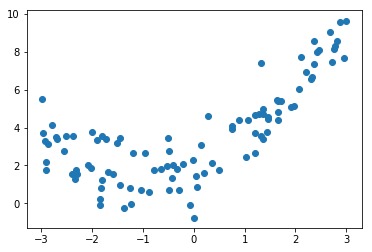

In [11]:
plt.scatter(x, y)
plt.show()

### 使用线性回归

In [38]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)
# 计算R2决定系数
# 表明x和y的线性关系比较弱
linear_reg.score(X, y)

0.4953707811865009

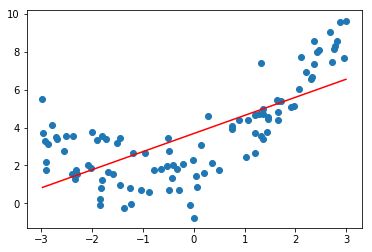

In [13]:
y_predict = linear_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

 使用均方误差进行拟合评价

In [14]:
from sklearn.metrics import mean_squared_error

y_predict = linear_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# 使用管道封装一个多项式回归对象
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [21]:
# 使用多项式回归进行拟合
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [23]:
y_predict = poly2_reg.predict(X)
# 计算均方误差
mean_squared_error(y, y_predict)

1.0987392142417856

可以看到使用多项式回归的误差较小    
下面进行可视化

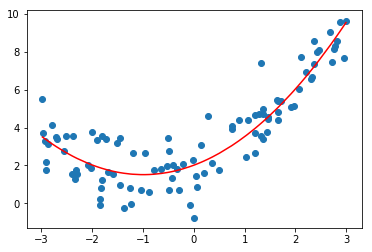

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

下面我们增加一下degree的值，提高曲线的阶数

In [25]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [26]:
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.050846676376417

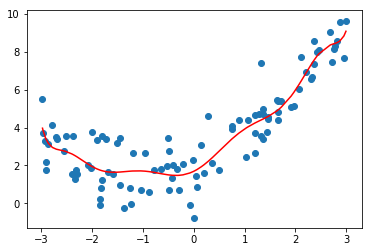

In [27]:
# 绘制拟合曲线
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

上图看出，提高阶数确实能够提高拟合的准确率     
下面给一个非常极端的阶数100   

In [28]:
ploy100_reg = PolynomialRegression(degree=100)
ploy100_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=100, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [29]:
y100_predict = ploy100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.682070834942428

当degree为100时，均方误差为0.68，非常小了

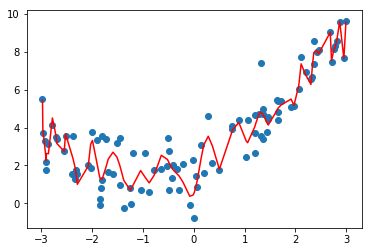

In [30]:
# 绘制曲线
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

上图绘制的曲线其实并不是在degree=100时拟合出来的曲线    
因为这里plot传入的x值是原本数据集的x坐标，他们的分布并不均匀，现在的曲线只是这些点对应的y_predict值之间的连线   
下面我们从新构建一组分布均匀的x值，然后进行绘制

In [33]:
# 先生成一组从-3到3的等差数列，size为100,并将其转换为矩阵形式
x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = ploy100_reg.predict(x_plot)

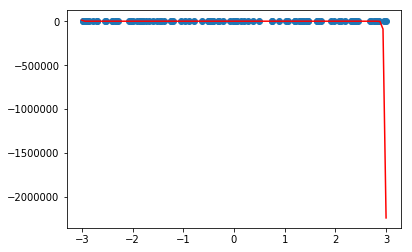

In [34]:
# 绘制真正的拟合曲线
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color='r')
plt.show()

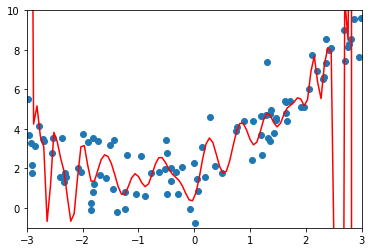

In [35]:
# 上图我们无法看出曲线的走向，下面对绘图坐标轴进行修改
# 参考上面的绘图，将y轴的范围定为[-1, 10]
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color='r')
# 限定坐标轴的范围
plt.axis([-3, 3, -1, 10])
plt.show()

上图显示的拟合结果为过拟合

### Train test split 的意义

* 使用测试数据集进行预测，然后计算均方误差，这时我们使用的是模型没有见过的数据，所以这个误差值可以较好的体现模型的泛化能力

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

先计算线性回归的误差

In [39]:
linear_reg.fit(X_train, y_train)
# 这里我们使用X_train,y_train训练数据进行拟合
# 然后使用X_test测试数据进行预测
y_predict = linear_reg.predict(X_test)
# 使用测试数据的预测值与测试数据计算误差
mean_squared_error(y_test, y_predict)

2.660400302710088

计算degree为2时的多项式回归误差

In [40]:
poly2_reg.fit(X_train, y_train)
y_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

0.8070018914333517

计算degree为10的多项式回归误差

In [41]:
poly10_reg.fit(X_train, y_train)
y_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

1.0158693956471467

 可以看到，当degree为10时，误差比degree为2时要大，但是上面使用全部数据集进行拟合时，求到的mse值要比现在的小    
 
 这就表明train test split可以反映出模型的泛化能力        

计算degree为100时的多项式回归误差

In [42]:
ploy100_reg.fit(X_train, y_train)
y_predict = ploy100_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

15083011562.23714

可以看到误差大的离谱，表明当前的模型泛化能力非常差